In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder , StandardScaler

In [ ]:
target_train = pd.read_csv('/content/target_train.csv')
sip = pd.read_csv('/content/sip_train.csv')
sub = pd.read_csv('/content/sample_submission.csv')
lom = pd.read_csv('/content/lom_train.csv')
chugun = pd.read_csv('/content/chugun_train.csv')
plavka = pd.read_csv('/content/plavki_train.csv')

In [ ]:
sip_test = pd.read_csv('/content/sip_test.csv')
lom_test = pd.read_csv('/content/lom_test.csv')
chugun_test = pd.read_csv('/content/chugun_test.csv')
plavka_test = pd.read_csv('/content/plavki_test.csv')

In [ ]:
target_train.head()

In [ ]:
sip.head()

,NPLV,VDSYP,NMSYP,VSSYP
0,510008,346,Уголь ТО,570
1,510008,346,Уголь ТО,220
2,510008,408,изв_ЦОИ,7300
3,510008,346,Уголь ТО,270
4,510008,346,Уголь ТО,430


In [ ]:
corr_sip = sip.corr()
ax , fig  = plt.subplots(figsize =(10 , 8 ))
sns.heatmap(corr_sip ,vmin = -1 , cmap='coolwarm', annot = True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


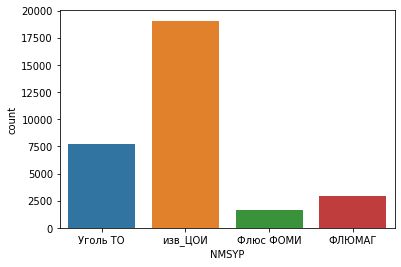

In [ ]:
sns.countplot(sip['NMSYP'])

In [ ]:
sip['NMSYP'].value_counts()

изв_ЦОИ      19055
Уголь ТО      7747
ФЛЮМАГ        2930
Флюс ФОМИ     1624
Name: NMSYP, dtype: int64

In [ ]:
sip_test['NMSYP'].value_counts()

изв_ЦОИ      7718
Уголь ТО     1049
ФЛЮМАГ        842
Флюс ФОМИ     341
изв_отсев     204
агл_офл_с     154
долом_сыр     147
Name: NMSYP, dtype: int64

In [ ]:
sip_test = sip_test.loc[sip_test['NMSYP'] != 'кокс_25_40']

In [ ]:
sip = sip.loc[sip['NMSYP'] != 'Долом(сыр)']
sip = sip.loc[sip['NMSYP'] != 'изв отсев']

## lom

In [ ]:
lom.head()

,NPLV,VDL,NML,VES
0,510008,4,К,56500
1,510008,8,О,16700
2,510008,13,КП,3000
3,510009,4,К,49800
4,510009,8,О,22800


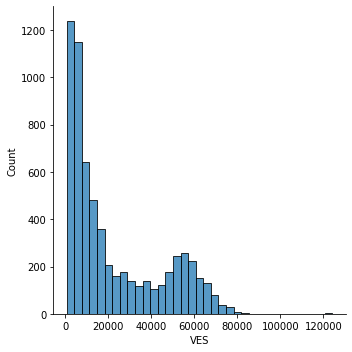

In [ ]:
sns.displot(lom['VES']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


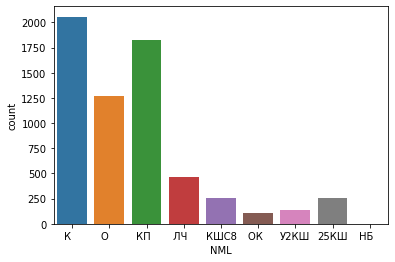

In [ ]:
sns.countplot(lom['NML'])

In [ ]:
lom['NML'].value_counts()

К       2056
КП      1826
О       1273
ЛЧ       463
25КШ     258
КШС8     254
У2КШ     133
ОК       107
НБ         1
Name: NML, dtype: int64

In [ ]:
lom= lom.loc[lom['NML'] != 'СК  ']

In [ ]:
corr_lom = lom.corr()
ax , fig  = plt.subplots(figsize =(10 , 8 ))
sns.heatmap(corr_lom ,vmin = -1 , cmap='coolwarm', annot = True)
plt.show()

## Plavka

In [ ]:
corr_plavka = plavka.corr()
ax , fig  = plt.subplots(figsize =(10 , 8 ))
sns.heatmap(corr_plavka ,vmin = -1 , cmap='coolwarm', annot = True)
plt.show()

In [ ]:
plavka.head()

,NPLV,plavka_VR_NACH,plavka_VR_KON,plavka_NMZ,plavka_NAPR_ZAD,plavka_STFUT,plavka_TIPE_FUR,plavka_ST_FURM,plavka_TIPE_GOL,plavka_ST_GOL
0,510008,2021-01-01 03:08:11,2021-01-01 03:51:10,С255,МНЛЗ,971,цилиндрическая,11,5 сопловая,11
1,510009,2021-01-01 04:00:44,2021-01-01 05:07:28,С255,МНЛЗ,972,цилиндрическая,12,5 сопловая,12
2,510010,2021-01-01 05:12:29,2021-01-01 06:00:53,Ст3пс/Э,Изл,973,цилиндрическая,13,5 сопловая,13
3,510011,2021-01-01 06:13:48,2021-01-01 07:08:39,Св-08А.z02,Изл,974,цилиндрическая,14,5 сопловая,14
4,510012,2021-01-01 07:13:44,2021-01-01 08:01:59,SC2M/ЭТ,МНЛС,975,цилиндрическая,15,5 сопловая,15


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


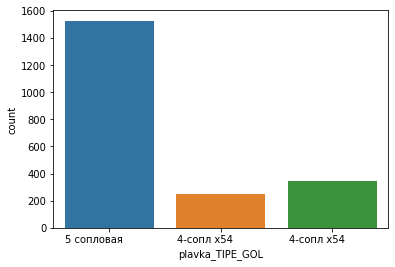

In [ ]:
sns.countplot(plavka['plavka_TIPE_GOL']);

In [ ]:
plavka['plavka_TIPE_GOL'].value_counts()

5 сопловая              1525
4-сопл х54               343
4-сопл x54               253
Name: plavka_TIPE_GOL, dtype: int64

In [ ]:
plavka_test['plavka_TIPE_GOL'].value_counts()

5 сопловая              408
4-сопл x54              228
4-сопл х54              119
Э37, 4-сопл х54          12
Э32                       8
601-5                     5
Name: plavka_TIPE_GOL, dtype: int64

In [ ]:
plavka = plavka.loc[plavka['plavka_TIPE_GOL'] != 'Э, 4-сопл х54       ']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


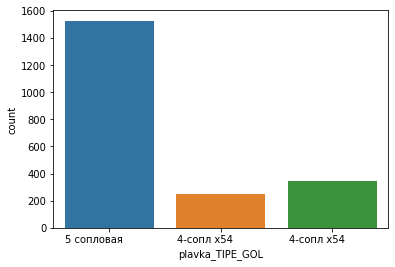

In [ ]:
sns.countplot(plavka['plavka_TIPE_GOL']);

In [ ]:
chugun

,NPLV,VES,T,SI,MN,S,P,CR,NI,CU,V,TI
0,510008,263700.0,1396.0,0.44,0.22,0.023,0.097,0.03,0.01,0.03,0.103,0.084
1,510009,264500.0,1419.0,0.68,0.20,0.017,0.087,0.02,0.01,0.03,0.084,0.096
2,510010,263800.0,1384.0,0.56,0.26,0.017,0.096,0.03,0.01,0.03,0.115,0.110
3,510011,264000.0,1401.0,0.48,0.27,0.018,0.091,0.03,0.01,0.02,0.112,0.110
4,510012,263300.0,1422.0,0.47,0.23,0.018,0.096,0.02,0.01,0.03,0.083,0.070
...,...,...,...,...,...,...,...,...,...,...,...,...
2058,512318,267200.0,1415.0,0.38,0.28,0.019,0.099,0.02,0.01,0.02,0.081,0.060
2059,512319,266800.0,1405.0,0.50,0.30,0.017,0.104,0.02,0.01,0.02,0.079,0.081
2060,512320,276100.0,1398.0,0.61,0.31,0.025,0.115,0.03,0.01,0.03,0.086,0.066
2061,512321,275800.0,1408.0,0.38,0.27,0.021,0.100,0.02,0.01,0.03,0.076,0.060


## Merge Train

In [ ]:
train1 = pd.merge(lom,sip , on = 'NPLV')
train2 = pd.merge(plavka,train1, on = 'NPLV')
merge_train = pd.merge(train2,chugun, on = 'NPLV')
train = pd.merge(merge_train ,target_train, on = 'NPLV')

In [ ]:
test2 = pd.merge(lom_test,sip_test, on = 'NPLV')
merge_test = pd.merge(plavka_test,test2, on = 'NPLV')
test = pd.merge(merge_test,chugun_test, on = 'NPLV')

In [ ]:
train.drop_duplicates(keep=False , inplace= True)

In [ ]:
train.head()

,NPLV,plavka_VR_NACH,plavka_VR_KON,plavka_NMZ,plavka_NAPR_ZAD,plavka_STFUT,plavka_TIPE_FUR,plavka_ST_FURM,plavka_TIPE_GOL,plavka_ST_GOL,VDL,NML,VES_x,VDSYP,NMSYP,VSSYP,DAT_OTD,VES_y,T,SI,MN,S,P,CR,NI,CU,V,TI,DATA_ZAMERA,TST,C
0,510008,2021-01-01 03:08:11,2021-01-01 03:51:10,С255,МНЛЗ,971,цилиндрическая,11,5 сопловая,11,4,К,56500,346,Уголь ТО,570,2021-01-01 03:03:53,263700.0,1396.0,0.44,0.22,0.023,0.097,0.03,0.01,0.03,0.103,0.084,2021-01-01 03:15:03,1690,0.06
1,510008,2021-01-01 03:08:11,2021-01-01 03:51:10,С255,МНЛЗ,971,цилиндрическая,11,5 сопловая,11,4,К,56500,346,Уголь ТО,220,2021-01-01 03:04:10,263700.0,1396.0,0.44,0.22,0.023,0.097,0.03,0.01,0.03,0.103,0.084,2021-01-01 03:15:03,1690,0.06
2,510008,2021-01-01 03:08:11,2021-01-01 03:51:10,С255,МНЛЗ,971,цилиндрическая,11,5 сопловая,11,4,К,56500,408,изв_ЦОИ,7300,2021-01-01 03:08:17,263700.0,1396.0,0.44,0.22,0.023,0.097,0.03,0.01,0.03,0.103,0.084,2021-01-01 03:15:03,1690,0.06
3,510008,2021-01-01 03:08:11,2021-01-01 03:51:10,С255,МНЛЗ,971,цилиндрическая,11,5 сопловая,11,4,К,56500,346,Уголь ТО,270,2021-01-01 03:09:03,263700.0,1396.0,0.44,0.22,0.023,0.097,0.03,0.01,0.03,0.103,0.084,2021-01-01 03:15:03,1690,0.06
4,510008,2021-01-01 03:08:11,2021-01-01 03:51:10,С255,МНЛЗ,971,цилиндрическая,11,5 сопловая,11,4,К,56500,346,Уголь ТО,430,2021-01-01 03:09:20,263700.0,1396.0,0.44,0.22,0.023,0.097,0.03,0.01,0.03,0.103,0.084,2021-01-01 03:15:03,1690,0.06


In [ ]:
test.head()

,NPLV,plavka_VR_NACH,plavka_VR_KON,plavka_NMZ,plavka_NAPR_ZAD,plavka_STFUT,plavka_TIPE_FUR,plavka_ST_FURM,plavka_TIPE_GOL,plavka_ST_GOL,VDL,NML,VES_x,VDSYP,NMSYP,VSSYP,DAT_OTD,VES_y,T,SI,MN,S,P,CR,NI,CU,V,TI,DATA_ZAMERA
0,512324,2021-05-05 17:41:21,2021-05-05 18:46:07,Ст3пс/Э,Изл,2,цилиндрическая,2,4-сопл х54,2,4,К,26040,408,изв_ЦОИ,3020,2021-05-05 17:38:59,240100.0,1355.0,0.46,0.33,0.027,0.079,0.01,0.01,0.02,0.048,0.03,2021-05-05 17:22:54
1,512324,2021-05-05 17:41:21,2021-05-05 18:46:07,Ст3пс/Э,Изл,2,цилиндрическая,2,4-сопл х54,2,4,К,26040,442,ФЛЮМАГ,1670,2021-05-05 17:42:07,240100.0,1355.0,0.46,0.33,0.027,0.079,0.01,0.01,0.02,0.048,0.03,2021-05-05 17:22:54
2,512324,2021-05-05 17:41:21,2021-05-05 18:46:07,Ст3пс/Э,Изл,2,цилиндрическая,2,4-сопл х54,2,4,К,26040,408,изв_ЦОИ,2810,2021-05-05 17:42:07,240100.0,1355.0,0.46,0.33,0.027,0.079,0.01,0.01,0.02,0.048,0.03,2021-05-05 17:22:54
3,512324,2021-05-05 17:41:21,2021-05-05 18:46:07,Ст3пс/Э,Изл,2,цилиндрическая,2,4-сопл х54,2,4,К,26040,346,Уголь ТО,140,2021-05-05 17:43:39,240100.0,1355.0,0.46,0.33,0.027,0.079,0.01,0.01,0.02,0.048,0.03,2021-05-05 17:22:54
4,512324,2021-05-05 17:41:21,2021-05-05 18:46:07,Ст3пс/Э,Изл,2,цилиндрическая,2,4-сопл х54,2,4,К,26040,346,Уголь ТО,70,2021-05-05 17:43:49,240100.0,1355.0,0.46,0.33,0.027,0.079,0.01,0.01,0.02,0.048,0.03,2021-05-05 17:22:54


In [ ]:
test.shape , train.shape

((35678, 29), (97432, 31))

In [ ]:
test['plavka_NMZ'].value_counts()

In [ ]:
train['plavka_NMZ'].value_counts()

In [ ]:
train.info()

In [ ]:
cat_cols = [
            'plavka_NMZ',
            'plavka_NAPR_ZAD',
            'plavka_TIPE_GOL',
            'plavka_TIPE_FUR',
            'NML',
            'NMSYP'
]
num_cols = [
            'O2_pressure',
            'CO',
            'CO2',
            'H2',
            'N2',
            'T',
            'VES',
            'VDL',
            'plavka_ST_GOL',
            'plavka_ST_FURM',
            'plavka_STFUT',
]

In [ ]:
le = LabelEncoder()
for i in cat_cols:
  train[i] = le.fit_transform(train[i])
  train[i] = train[i].astype(int)
  test[i] = le.fit_transform(test[i])
  test[i] = test[i].astype(int)

In [ ]:
train['plavka_VR_NACH'] = train['plavka_VR_NACH'].astype('datetime64[ns]').astype(np.int64)/10**9
train['plavka_VR_KON'] = train['plavka_VR_KON'].astype('datetime64[ns]').astype(np.int64)/10**9
train['DAT_OTD'] = train['DAT_OTD'].astype('datetime64[ns]').astype(np.int64)/10**9
train['DATA_ZAMERA'] = train['DATA_ZAMERA'].astype('datetime64[ns]').astype(np.int64)/10**9
test['plavka_VR_NACH'] = test['plavka_VR_NACH'].astype('datetime64[ns]').astype(np.int64)/10**9
test['plavka_VR_KON'] = test['plavka_VR_KON'].astype('datetime64[ns]').astype(np.int64)/10**9
test['DAT_OTD'] = test['DAT_OTD'].astype('datetime64[ns]').astype(np.int64)/10**9
test['DATA_ZAMERA'] = test['DATA_ZAMERA'].astype('datetime64[ns]').astype(np.int64)/10**9

In [ ]:
train.head()

,NPLV,plavka_VR_NACH,plavka_VR_KON,plavka_NMZ,plavka_NAPR_ZAD,plavka_STFUT,plavka_TIPE_FUR,plavka_ST_FURM,plavka_TIPE_GOL,plavka_ST_GOL,VDL,NML,VES_x,VDSYP,NMSYP,VSSYP,DAT_OTD,VES_y,T,SI,MN,S,P,CR,NI,CU,V,TI,DATA_ZAMERA,TST,C
0,510008,1.609470e+09,1.609473e+09,42,1,971,1,11,2,11,4,1,56500,346,1,570,1.609470e+09,263700.0,1396.0,0.44,0.22,0.023,0.097,0.03,0.01,0.03,0.103,0.084,1.609471e+09,1690,0.06
1,510008,1.609470e+09,1.609473e+09,42,1,971,1,11,2,11,4,1,56500,346,1,220,1.609470e+09,263700.0,1396.0,0.44,0.22,0.023,0.097,0.03,0.01,0.03,0.103,0.084,1.609471e+09,1690,0.06
2,510008,1.609470e+09,1.609473e+09,42,1,971,1,11,2,11,4,1,56500,408,5,7300,1.609470e+09,263700.0,1396.0,0.44,0.22,0.023,0.097,0.03,0.01,0.03,0.103,0.084,1.609471e+09,1690,0.06
3,510008,1.609470e+09,1.609473e+09,42,1,971,1,11,2,11,4,1,56500,346,1,270,1.609471e+09,263700.0,1396.0,0.44,0.22,0.023,0.097,0.03,0.01,0.03,0.103,0.084,1.609471e+09,1690,0.06
4,510008,1.609470e+09,1.609473e+09,42,1,971,1,11,2,11,4,1,56500,346,1,430,1.609471e+09,263700.0,1396.0,0.44,0.22,0.023,0.097,0.03,0.01,0.03,0.103,0.084,1.609471e+09,1690,0.06


In [ ]:
test.head()

,NPLV,plavka_VR_NACH,plavka_VR_KON,plavka_NMZ,plavka_NAPR_ZAD,plavka_STFUT,plavka_TIPE_FUR,plavka_ST_FURM,plavka_TIPE_GOL,plavka_ST_GOL,VDL,NML,VES_x,VDSYP,NMSYP,VSSYP,DAT_OTD,VES_y,T,SI,MN,S,P,CR,NI,CU,V,TI,DATA_ZAMERA
0,512324,1.620236e+09,1.620240e+09,29,0,2,1,2,1,2,4,1,26040,408,5,3020,1.620236e+09,240100.0,1355.0,0.46,0.33,0.027,0.079,0.01,0.01,0.02,0.048,0.03,1.620235e+09
1,512324,1.620236e+09,1.620240e+09,29,0,2,1,2,1,2,4,1,26040,442,1,1670,1.620237e+09,240100.0,1355.0,0.46,0.33,0.027,0.079,0.01,0.01,0.02,0.048,0.03,1.620235e+09
2,512324,1.620236e+09,1.620240e+09,29,0,2,1,2,1,2,4,1,26040,408,5,2810,1.620237e+09,240100.0,1355.0,0.46,0.33,0.027,0.079,0.01,0.01,0.02,0.048,0.03,1.620235e+09
3,512324,1.620236e+09,1.620240e+09,29,0,2,1,2,1,2,4,1,26040,346,0,140,1.620237e+09,240100.0,1355.0,0.46,0.33,0.027,0.079,0.01,0.01,0.02,0.048,0.03,1.620235e+09
4,512324,1.620236e+09,1.620240e+09,29,0,2,1,2,1,2,4,1,26040,346,0,70,1.620237e+09,240100.0,1355.0,0.46,0.33,0.027,0.079,0.01,0.01,0.02,0.048,0.03,1.620235e+09


In [ ]:
train.isnull().sum()

NPLV                0
plavka_VR_NACH      0
plavka_VR_KON       0
plavka_NMZ          0
plavka_NAPR_ZAD     0
plavka_STFUT        0
plavka_TIPE_FUR     0
plavka_ST_FURM      0
plavka_TIPE_GOL     0
plavka_ST_GOL       0
VDL                 0
NML                 0
VES_x               0
VDSYP               0
NMSYP               0
VSSYP               0
DAT_OTD             0
VES_y               0
T                   0
SI                  0
MN                  0
S                   0
P                   0
CR                  0
NI                  0
CU                  0
V                   0
TI                  0
DATA_ZAMERA         0
TST                 0
C                  44
dtype: int64

In [ ]:
train.loc[train["C"].isna(), "C"] = \
    train.loc[train["C"].isna(), "TST"].map(train.groupby("TST")["C"].first())

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87061 entries, 0 to 97509
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NPLV             87061 non-null  int64  
 1   TST              87061 non-null  int64  
 2   C                87061 non-null  float64
 3   plavka_VR_NACH   87061 non-null  float64
 4   plavka_VR_KON    87061 non-null  float64
 5   plavka_NMZ       87061 non-null  int64  
 6   plavka_NAPR_ZAD  87061 non-null  int64  
 7   plavka_STFUT     87061 non-null  int64  
 8   plavka_TIPE_FUR  87061 non-null  int64  
 9   plavka_ST_FURM   87061 non-null  int64  
 10  plavka_TIPE_GOL  87061 non-null  int64  
 11  plavka_ST_GOL    87061 non-null  int64  
 12  VDL              87061 non-null  int64  
 13  NML              87061 non-null  int64  
 14  VES_x            87061 non-null  int64  
 15  VDSYP            87061 non-null  int64  
 16  NMSYP            87061 non-null  int64  
 17  VSSYP       

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
X = train.drop(['TST', 'C' , 'NPLV'], axis=1)
y = train[['TST', 'C']]

In [ ]:
X

,plavka_VR_NACH,plavka_VR_KON,plavka_NMZ,plavka_NAPR_ZAD,plavka_STFUT,plavka_TIPE_FUR,plavka_ST_FURM,plavka_TIPE_GOL,plavka_ST_GOL,VDL,NML,VES_x,VDSYP,NMSYP,VSSYP,DAT_OTD,VES_y,T,SI,MN,S,P,CR,NI,CU,V,TI,DATA_ZAMERA
0,1.609470e+09,1.609473e+09,42,1,971,1,11,2,11,4,1,56500,346,1,570,1.609470e+09,263700.0,1396.0,0.44,0.22,0.023,0.097,0.03,0.01,0.03,0.103,0.084,1.609471e+09
1,1.609470e+09,1.609473e+09,42,1,971,1,11,2,11,4,1,56500,346,1,220,1.609470e+09,263700.0,1396.0,0.44,0.22,0.023,0.097,0.03,0.01,0.03,0.103,0.084,1.609471e+09
2,1.609470e+09,1.609473e+09,42,1,971,1,11,2,11,4,1,56500,408,5,7300,1.609470e+09,263700.0,1396.0,0.44,0.22,0.023,0.097,0.03,0.01,0.03,0.103,0.084,1.609471e+09
3,1.609470e+09,1.609473e+09,42,1,971,1,11,2,11,4,1,56500,346,1,270,1.609471e+09,263700.0,1396.0,0.44,0.22,0.023,0.097,0.03,0.01,0.03,0.103,0.084,1.609471e+09
4,1.609470e+09,1.609473e+09,42,1,971,1,11,2,11,4,1,56500,346,1,430,1.609471e+09,263700.0,1396.0,0.44,0.22,0.023,0.097,0.03,0.01,0.03,0.103,0.084,1.609471e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98129,1.619458e+09,1.619463e+09,23,1,3285,0,26,2,60,48,8,3400,408,5,30,1.619462e+09,279200.0,1413.0,0.50,0.31,0.019,0.105,0.02,0.01,0.03,0.077,0.067,1.619457e+09
98130,1.619458e+09,1.619463e+09,23,1,3285,0,26,2,60,48,8,3400,408,5,490,1.619462e+09,279200.0,1413.0,0.50,0.31,0.019,0.105,0.02,0.01,0.03,0.077,0.067,1.619457e+09
98131,1.619458e+09,1.619463e+09,23,1,3285,0,26,2,60,48,8,3400,408,5,20,1.619462e+09,279200.0,1413.0,0.50,0.31,0.019,0.105,0.02,0.01,0.03,0.077,0.067,1.619457e+09
98132,1.619458e+09,1.619463e+09,23,1,3285,0,26,2,60,48,8,3400,408,5,970,1.619462e+09,279200.0,1413.0,0.50,0.31,0.019,0.105,0.02,0.01,0.03,0.077,0.067,1.619457e+09


In [ ]:
y

,TST,C
0,1690,0.060
1,1690,0.060
2,1690,0.060
3,1690,0.060
4,1690,0.060
...,...,...
98129,1630,0.183
98130,1630,0.183
98131,1630,0.183
98132,1630,0.183


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor , StackingRegressor , GradientBoostingRegressor , ExtraTreesRegressor
from sklearn.linear_model import Lasso , Ridge , LinearRegression , ElasticNet
from sklearn.svm import SVR
from sklearn.multioutput import RegressorChain
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [ ]:
def get_stacking_regressor():
    xgb = XGBRegressor(objective= 'reg:squarederror' , n_estimators= 1000 )
    rf = RandomForestRegressor(n_jobs = -1 , random_state= 42 , n_estimators= 1000)
    ridge = Ridge()
    svm = SVR()
    lgb = LGBMRegressor(n_estimators= 1000)
    lasso = Lasso()
    cat = CatBoostRegressor(verbose = False , task_type='GPU' , devices='0:1')
    grad = GradientBoostingRegressor(n_estimators= 1000 , random_state= 24)
    extra = ExtraTreesRegressor(n_estimators=1000 , random_state= 12)
    elast = ElasticNet()
    stacking_estimators = [
                ('cat', cat),
                ('rfr', rf),
                ('lasso',lasso),
                ('lgb', lgb),
                ('ridge' , ridge),
                ('svm' , svm),
                ('grad' , grad),
                ('extra' , extra)
    ]
    return StackingRegressor(estimators=stacking_estimators, final_estimator=elast)

In [ ]:
model = RegressorChain(get_stacking_regressor())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mean_absolute_error(y_test,y_pred)

0.0028802672376054177

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
y_pred

array([[1.69304652e+03, 3.57476878e-02],
       [1.64398686e+03, 8.87958401e-02],
       [1.68400376e+03, 7.51666820e-02],
       ...,
       [1.62801700e+03, 5.40060643e-02],
       [1.64302770e+03, 9.48934344e-02],
       [1.64095471e+03, 5.79709370e-02]])

In [ ]:
X

,plavka_VR_NACH,plavka_VR_KON,plavka_NMZ,plavka_NAPR_ZAD,plavka_STFUT,plavka_TIPE_FUR,plavka_ST_FURM,plavka_TIPE_GOL,plavka_ST_GOL,VDL,NML,VES_x,VDSYP,NMSYP,VSSYP,DAT_OTD,VES_y,T,SI,MN,S,P,CR,NI,CU,V,TI,DATA_ZAMERA
0,1.609470e+09,1.609473e+09,42,1,971,1,11,2,11,4,1,56500,346,0,570,1.609470e+09,263700.0,1396.0,0.44,0.22,0.023,0.097,0.03,0.01,0.03,0.103,0.084,1.609471e+09
1,1.609470e+09,1.609473e+09,42,1,971,1,11,2,11,4,1,56500,346,0,220,1.609470e+09,263700.0,1396.0,0.44,0.22,0.023,0.097,0.03,0.01,0.03,0.103,0.084,1.609471e+09
2,1.609470e+09,1.609473e+09,42,1,971,1,11,2,11,4,1,56500,408,3,7300,1.609470e+09,263700.0,1396.0,0.44,0.22,0.023,0.097,0.03,0.01,0.03,0.103,0.084,1.609471e+09
3,1.609470e+09,1.609473e+09,42,1,971,1,11,2,11,4,1,56500,346,0,270,1.609471e+09,263700.0,1396.0,0.44,0.22,0.023,0.097,0.03,0.01,0.03,0.103,0.084,1.609471e+09
4,1.609470e+09,1.609473e+09,42,1,971,1,11,2,11,4,1,56500,346,0,430,1.609471e+09,263700.0,1396.0,0.44,0.22,0.023,0.097,0.03,0.01,0.03,0.103,0.084,1.609471e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98408,1.619458e+09,1.619463e+09,23,1,3285,0,26,2,60,48,9,3400,408,3,30,1.619462e+09,279200.0,1413.0,0.50,0.31,0.019,0.105,0.02,0.01,0.03,0.077,0.067,1.619457e+09
98409,1.619458e+09,1.619463e+09,23,1,3285,0,26,2,60,48,9,3400,408,3,490,1.619462e+09,279200.0,1413.0,0.50,0.31,0.019,0.105,0.02,0.01,0.03,0.077,0.067,1.619457e+09
98410,1.619458e+09,1.619463e+09,23,1,3285,0,26,2,60,48,9,3400,408,3,20,1.619462e+09,279200.0,1413.0,0.50,0.31,0.019,0.105,0.02,0.01,0.03,0.077,0.067,1.619457e+09
98411,1.619458e+09,1.619463e+09,23,1,3285,0,26,2,60,48,9,3400,408,3,970,1.619462e+09,279200.0,1413.0,0.50,0.31,0.019,0.105,0.02,0.01,0.03,0.077,0.067,1.619457e+09


In [ ]:
pred = model.predict(c)

In [ ]:
c = test.copy()

In [ ]:
c = c.drop(columns='NPLV', axis = 1)

In [ ]:
test

,NPLV,plavka_VR_NACH,plavka_VR_KON,plavka_NMZ,plavka_NAPR_ZAD,plavka_STFUT,plavka_TIPE_FUR,plavka_ST_FURM,plavka_TIPE_GOL,plavka_ST_GOL,VDL,NML,VES_x,VDSYP,NMSYP,VSSYP,DAT_OTD,VES_y,T,SI,MN,S,P,CR,NI,CU,V,TI,DATA_ZAMERA
0,512324,1.620236e+09,1.620240e+09,29,0,2,1,2,1,2,4,1,26040,408,5,3020,1.620236e+09,240100.0,1355.0,0.46,0.33,0.027,0.079,0.01,0.01,0.02,0.048,0.030,1.620235e+09
1,512324,1.620236e+09,1.620240e+09,29,0,2,1,2,1,2,4,1,26040,442,1,1670,1.620237e+09,240100.0,1355.0,0.46,0.33,0.027,0.079,0.01,0.01,0.02,0.048,0.030,1.620235e+09
2,512324,1.620236e+09,1.620240e+09,29,0,2,1,2,1,2,4,1,26040,408,5,2810,1.620237e+09,240100.0,1355.0,0.46,0.33,0.027,0.079,0.01,0.01,0.02,0.048,0.030,1.620235e+09
3,512324,1.620236e+09,1.620240e+09,29,0,2,1,2,1,2,4,1,26040,346,0,140,1.620237e+09,240100.0,1355.0,0.46,0.33,0.027,0.079,0.01,0.01,0.02,0.048,0.030,1.620235e+09
4,512324,1.620236e+09,1.620240e+09,29,0,2,1,2,1,2,4,1,26040,346,0,70,1.620237e+09,240100.0,1355.0,0.46,0.33,0.027,0.079,0.01,0.01,0.02,0.048,0.030,1.620235e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35652,513374,1.625007e+09,1.625009e+09,31,1,1052,1,7,3,7,23,4,2000,346,0,630,1.625007e+09,270600.0,1396.0,0.36,0.33,0.026,0.104,0.02,0.01,0.02,0.092,0.052,1.625004e+09
35653,513374,1.625007e+09,1.625009e+09,31,1,1052,1,7,3,7,23,4,2000,346,0,2310,1.625007e+09,270600.0,1396.0,0.36,0.33,0.026,0.104,0.02,0.01,0.02,0.092,0.052,1.625004e+09
35654,513374,1.625007e+09,1.625009e+09,31,1,1052,1,7,3,7,23,4,2000,408,5,10010,1.625007e+09,270600.0,1396.0,0.36,0.33,0.026,0.104,0.02,0.01,0.02,0.092,0.052,1.625004e+09
35655,513374,1.625007e+09,1.625009e+09,31,1,1052,1,7,3,7,23,4,2000,346,0,670,1.625007e+09,270600.0,1396.0,0.36,0.33,0.026,0.104,0.02,0.01,0.02,0.092,0.052,1.625004e+09


In [ ]:
e = pred.copy()
e.resize(780,2)

In [ ]:
e

array([[1.63814895e+03, 1.60110325e-01],
       [1.63814907e+03, 1.60110642e-01],
       [1.63814896e+03, 1.60110326e-01],
       ...,
       [1.67005792e+03, 1.07717113e-01],
       [1.67005792e+03, 1.07717113e-01],
       [1.63876493e+03, 1.74671168e-01]])

In [ ]:
sub[['TST' , 'C']] = e

In [ ]:
sub[:25]

,NPLV,TST,C
0,512324,1638.148955,0.160110
1,512327,1638.149070,0.160111
2,512328,1638.148961,0.160110
3,512331,1638.149456,0.160110
4,512333,1638.149458,0.160110
5,512339,1638.149456,0.160110
6,512344,1638.149257,0.160110
7,512348,1638.149063,0.160110
8,512349,1638.149067,0.160110
9,512350,1638.149037,0.160110


In [ ]:
sub.to_csv('./submisson6.csv', index = False)